<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Drop-columns-not-available-at-the-moment-of-the-reservation" data-toc-modified-id="Drop-columns-not-available-at-the-moment-of-the-reservation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Drop columns not available at the moment of the reservation</a></span></li><li><span><a href="#First-visualisations-:-compare-the-group-of-people-who-required-a-parking-spot-with-the-one-who-didn't-on-several-features" data-toc-modified-id="First-visualisations-:-compare-the-group-of-people-who-required-a-parking-spot-with-the-one-who-didn't-on-several-features-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>First visualisations : compare the group of people who required a parking spot with the one who didn't on several features</a></span></li><li><span><a href="#First-analysis-of-relations-between-parking-and-other-features" data-toc-modified-id="First-analysis-of-relations-between-parking-and-other-features-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>First analysis of relations between parking and other features</a></span><ul class="toc-item"><li><span><a href="#Type-of-hotel" data-toc-modified-id="Type-of-hotel-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Type of hotel</a></span></li><li><span><a href="#Children" data-toc-modified-id="Children-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Children</a></span></li><li><span><a href="#Date-columns" data-toc-modified-id="Date-columns-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Date columns</a></span></li><li><span><a href="#Month" data-toc-modified-id="Month-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Month</a></span></li><li><span><a href="#Customer-type" data-toc-modified-id="Customer-type-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Customer type</a></span></li><li><span><a href="#Country" data-toc-modified-id="Country-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Country</a></span></li><li><span><a href="#Reserved-room-type-and-special-requests" data-toc-modified-id="Reserved-room-type-and-special-requests-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Reserved room type and special requests</a></span></li></ul></li><li><span><a href="#Keeping-features" data-toc-modified-id="Keeping-features-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Keeping features</a></span></li></ul></div>

<h1><center> TP2: Pandas, data analysis library </center></h1>

The deadline for report submission is Tuesday, December 14th 2021.

Note: the goal of this TP is to become familiar with 'pandas' class in Python. This library is often used for data analysis and is convenient for manipulation tool.
We consider a case study based on a dataset that contains information about bookings of two hotels. Hotel 1 is a resort hotel and Hotel 2 is a city hotel in Portugal. The dataset was released by https://www.sciencedirect.com/science/article/pii/S2352340918315191.

We first list the basic function in pandas. PART 1 aims at using pandas as a visualization tools to a better understanding of data. PART 2 shows how easy it is to combine "pandas" dataframes and "sklearn" models to build additional features and predict. 

As a homework, we propose you a very concret problem which is open and for which we are waiting for your creativity (as usual)!

In [258]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('fivethirtyeight')

# Short intro into pandas

In [259]:
data = pd.read_csv("data/bookings.csv") 

In [260]:
data.head(5) # print first 5 entries of the dataset

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [207]:
data.columns # print column names

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

This dataset contains information about bookings of two hotels. Hotel 1 is a resort hotel and Hotel 2 is a city hotel in Portugal. The dataset was released by https://www.sciencedirect.com/science/article/pii/S2352340918315191.

There are 32 columns in this dataset:

1. **hotel** -- one of the two hotels
2. **is_canceled** -- Value indicating if the booking was canceled (1) or not (0)
3. **lead_time** -- Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
4. ....

For the full description of each column please see: https://www.kaggle.com/jessemostipak/hotel-booking-demand

In [208]:
data['country'] # we can also print each column of the dataset

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 119390, dtype: object

In [7]:
data['country'].unique() # list all unique values in the column

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [209]:
data.count()

hotel                             119390
is_canceled                       119390
lead_time                         119390
arrival_date_year                 119390
arrival_date_month                119390
arrival_date_week_number          119390
arrival_date_day_of_month         119390
stays_in_weekend_nights           119390
stays_in_week_nights              119390
adults                            119390
children                          119386
babies                            119390
meal                              119390
country                           118902
market_segment                    119390
distribution_channel              119390
is_repeated_guest                 119390
previous_cancellations            119390
previous_bookings_not_canceled    119390
reserved_room_type                119390
assigned_room_type                119390
booking_changes                   119390
deposit_type                      119390
agent                             103050
company         

This dataset contains 119390 different reservations. Some of the reservations have missing values.


In [210]:
data.values # A data frame can be converted into a numpy array by calling the values attribute:

array([['Resort Hotel', 0, 342, ..., 0, 'Check-Out', '2015-07-01'],
       ['Resort Hotel', 0, 737, ..., 0, 'Check-Out', '2015-07-01'],
       ['Resort Hotel', 0, 7, ..., 0, 'Check-Out', '2015-07-02'],
       ...,
       ['City Hotel', 0, 34, ..., 4, 'Check-Out', '2017-09-07'],
       ['City Hotel', 0, 109, ..., 0, 'Check-Out', '2017-09-07'],
       ['City Hotel', 0, 205, ..., 2, 'Check-Out', '2017-09-07']],
      dtype=object)

However this array cannot be directly fed to a scikit-learn model.

1. the values are heterogeneous (strings for categories, integers, and floating point numbers)
2. some attribute values are missing

# Predicting cancellation: Part I -- visualization

**Our goals** The goal of this part is to provide few examples of visualization combining ```pandas```, ```matplotlib```, ```seaborn```. 

We will look at a very natural and practical task -- predicting cancellation of a given reservation. Of course, the first instinct of the modern 'ML practitioner' is to throw all the data to some neural net and perform bunch of fine-tuning. There are really a lot of problems with such an approach. As a general rule of thumbs: explore your data before building ML pipelines! It is alway more interesting to investigate the data and find human-interpretable patterns.

Pandas allows to manipulate the dataset in a very convenient manner. Those familiar with SQL will certainly appreciate it! 

As the first visualization task let us understand which monthes have the most amount of cancellations.
We start by creating a new dataset that contains the information that we would like to plot.

In [211]:

'''
 We create two datasets for each hotel .groupby("arrival_date_month") will group observations by the month
 and .count() function will simply count the amount of reservations for each month
'''
n_reserv_H1 = data.loc[(data["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["hotel"].count()
n_cancel_H1 = data.loc[(data["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

# same thing we do for the second hotel
n_reserv_H2 = data.loc[(data["hotel"] == "City Hotel")].groupby("arrival_date_month")["hotel"].count()
n_cancel_H2 = data.loc[(data["hotel"] == "City Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

In [212]:
n_reserv_H1.head() # again we can have a look at the top 5 entries

arrival_date_month
April       3609
August      4894
December    2648
February    3103
January     2193
Name: hotel, dtype: int64

In [12]:
n_reserv_H1['April'] # number of reservation for Resort Hotel for April

3609

In [13]:
n_cancel_H1['April'] # number of cancelled reservations for Resort Hotel

1059

In [14]:
# finally, we gather everything together


data_visualH1 = pd.DataFrame({"hotel": "Resort Hotel",
                                "month": list(n_reserv_H1.index),
                                "n_booking": list(n_reserv_H1.values),
                                "n_cancel": list(n_cancel_H1.values)})
data_visualH2 = pd.DataFrame({"hotel": "City Hotel",
                                "month": list(n_reserv_H2.index),
                                "n_booking": list(n_reserv_H2.values),
                                "n_cancel": list(n_cancel_H2.values)})
data_visual = pd.concat([data_visualH1, data_visualH2], ignore_index=True)

# notice how easy it is to add a new column. We simply write the following
data_visual["percent_cancel"] = data_visual["n_cancel"] / data_visual["n_booking"] * 100 # percent of cancelations

In [15]:
data_visual.head() # our final dataset

,hotel,month,n_booking,n_cancel,percent_cancel
0,Resort Hotel,April,3609,1059,29.343308
1,Resort Hotel,August,4894,1637,33.449121
2,Resort Hotel,December,2648,631,23.829305
3,Resort Hotel,February,3103,795,25.620367
4,Resort Hotel,January,2193,325,14.819881


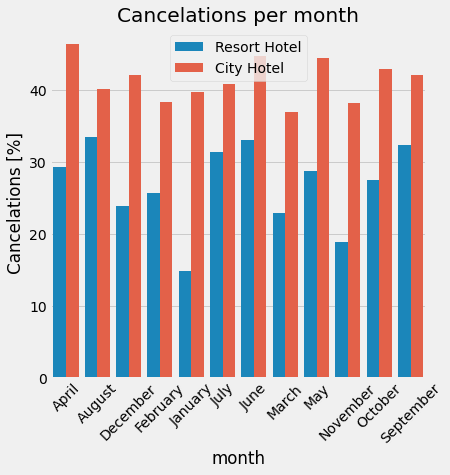

In [32]:
# plotting is simple once we have good dataset.
plt.figure(figsize=(6, 6))
sns.barplot(x = "month", y = "percent_cancel" , hue="hotel",
            hue_order = ["Resort Hotel", "City Hotel"], data=data_visual)
plt.title("Cancelations per month")
plt.xticks(rotation=45)
plt.ylabel("Cancelations [%]")
plt.legend()
plt.show()

Previous plot is nice, but the ordering of the month is very annoying!

**Question 1.** Propose a solution that will re-order the barplot above using standard month ordering. Hint: use ```pd.Categorical()``` function of pandas.

In [33]:
month_order = ["January", "February", "March", "April", 'May', 'June', 'July', 'August', 'September', 'October',
              "November", 'December']

cat=pd.CategoricalDtype(categories = month_order, ordered = True)

In [34]:
cat

CategoricalDtype(categories=['January', 'February', 'March', 'April', 'May', 'June',
                  'July', 'August', 'September', 'October', 'November',
                  'December'],
, ordered=True)

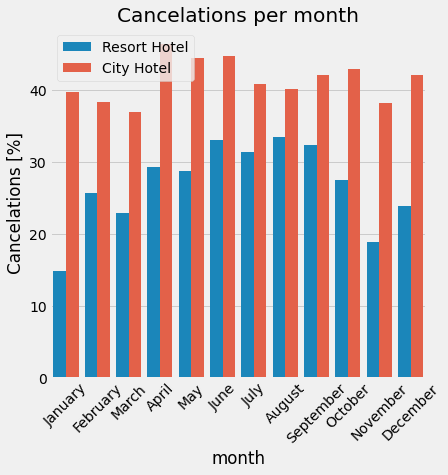

In [35]:
data_visual['sort']= pd.Series(data_visual['month'], dtype = cat)

# plotting is simple once we have good dataset.
plt.figure(figsize=(6, 6))
sns.barplot(x = "month", y = "percent_cancel" , hue="hotel",
            hue_order = ["Resort Hotel", "City Hotel"], data=data_visual.sort_values(by=['sort']))
plt.title("Cancelations per month")
plt.xticks(rotation=45)
plt.ylabel("Cancelations [%]")
plt.legend()
plt.show()

data_visual.drop(['sort'], axis=1, inplace=True)

**Question 2.** Provide interpretation of the above plot.

In [20]:
data_visual.loc[data_visual["hotel"]=="Resort Hotel"].describe()

,n_booking,n_cancel,percent_cancel
count,12.000000,12.000000,12.000000
mean,3338.333333,926.833333,26.831122
std,792.500913,371.330736,5.861114
min,2193.000000,325.000000,14.819881
25%,2945.750000,730.000000,23.589905
50%,3222.000000,992.000000,28.141338
75%,3571.500000,1032.750000,31.643300
max,4894.000000,1637.000000,33.449121


In [21]:
data_visual.loc[data_visual["hotel"]=="City Hotel"].describe()

,n_booking,n_cancel,percent_cancel
count,12.000000,12.000000,12.000000
mean,6610.833333,2758.500000,41.374904
std,1825.866361,854.461925,2.900231
min,3736.000000,1482.000000,36.946423
25%,4813.000000,1860.750000,39.323075
50%,7440.000000,3189.000000,41.451199
75%,7942.500000,3480.750000,43.322699
max,8983.000000,3653.000000,46.323529


**Question 3.** What is the most and the second most common country of origin for reservations of each hotel?

In [22]:
data.loc[(data["hotel"] == "Resort Hotel")].groupby("country")["hotel"].count().sort_values(ascending=False)

country
PRT    17630
GBR     6814
ESP     3957
IRL     2166
FRA     1611
       ...  
MKD        1
PLW        1
PER        1
MUS        1
CYM        1
Name: hotel, Length: 125, dtype: int64

In [23]:
data.loc[(data["hotel"] == "City Hotel")].groupby("country")["hotel"].count().sort_values(ascending=False)

country
PRT    30960
FRA     8804
DEU     6084
GBR     5315
ESP     4611
       ...  
MRT        1
SDN        1
NAM        1
NCL        1
KIR        1
Name: hotel, Length: 166, dtype: int64

**Question 4.** Plot the number of cancelations for repeated and not repeated guests for both hotels.

[]

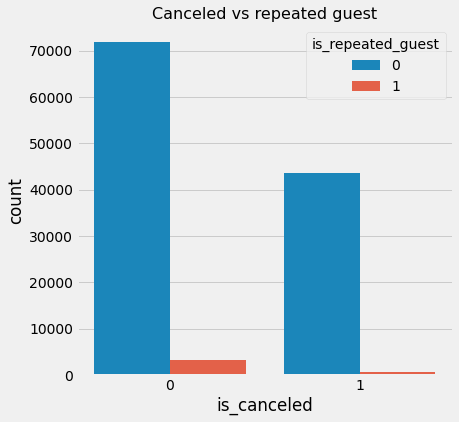

In [36]:
plt.figure(figsize=(6, 6))
sns.countplot(x="is_canceled", hue='is_repeated_guest', data=data)
plt.title("Canceled vs repeated guest", fontsize=16)
plt.plot()

Most guests in these two hotels are not repeated, while the repreated guests are less likely to cancel.

Text(0, 0.5, 'Count')

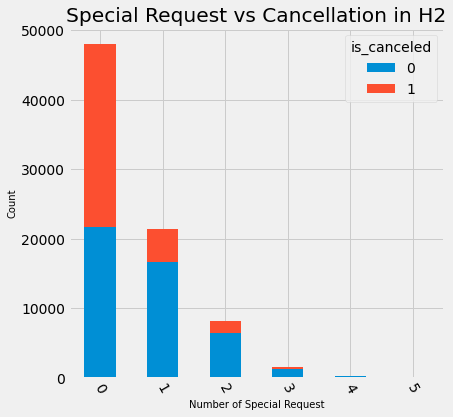

In [37]:
data_req = data[(data['hotel'] == 'City Hotel')].groupby(['total_of_special_requests', 'is_canceled']).size().unstack(level=1)
data_req.plot(kind='bar', stacked=True, figsize=(6,6))
plt.title('Special Request vs Cancellation in H2')
plt.xlabel('Number of Special Request', fontsize=10)
plt.xticks(rotation=300)
plt.ylabel('Count', fontsize=10)

Most of the reservations in the city hotel have no special requests and the cancelation in this case is almost 50/50. However, when special requests are made, the cancelation rate is significantly lower.

**Question 5.** Make the same plot for Resort Hotel. Make your conclusions.

Text(0, 0.5, 'Count')

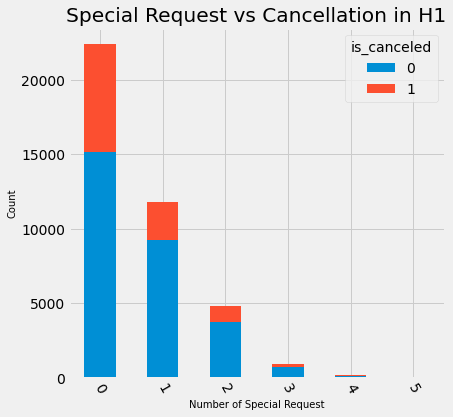

In [38]:
data_req = data[(data['hotel'] == 'Resort Hotel')].groupby(['total_of_special_requests', 'is_canceled']).size().unstack(level=1)
data_req.plot(kind='bar', stacked=True, figsize=(6,6))
plt.title('Special Request vs Cancellation in H1')
plt.xlabel('Number of Special Request', fontsize=10)
plt.xticks(rotation=300)
plt.ylabel('Count', fontsize=10)

# Predicting cancellations: Part II -- ML

**Our goals** The main message here is -- do not re-invent the wheel. The following few lines of code highlight the simplicity with which we can combine ```pandas``` dataframes and ```sklearn``` models. By learning few simple tools (i.e. ```pipeline```, ```gridsearchcv```) our code becomes readable, compact, and can be used to build extra features on top of it.

In [162]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [108]:
numeric_features = ["lead_time", "arrival_date_week_number", "total_of_special_requests"]
categorical_features = ["hotel", "market_segment","deposit_type","customer_type"]
features = numeric_features + categorical_features
X = data.drop(["is_canceled"], axis=1)[features]
y = data["is_canceled"]

Before using any ML algorithm from sklearn we need to handle missing values. There is no unique answer on how to deal with missing values in your dataset. We will use possibly the simplest approach. First of all if the feature is numerical and is misisng, we are going to replace it with zero. Secondly, if the feature is categorical and is missing, then we are going to define a new category and call it ```Not defined```.

In [30]:
numeric_transformer = SimpleImputer(strategy="constant", fill_value=0) # to deal with missing numeric data
categorical_transformer = Pipeline(steps=[
                                    ("imputer", SimpleImputer(strategy="constant", fill_value="Not defined")),
                                    ("onehot", OneHotEncoder(handle_unknown='ignore'))]) # to deal with missing categorical data 
preproc = ColumnTransformer(transformers=[("num", numeric_transformer, numeric_features),
                                          ("cat", categorical_transformer, categorical_features)])

**Question:** What is ```OneHotEncoder()```? Why do we use it in our case?

OneHotEncoder allows to encode categorical in numerical data to feed our ML algorithms with. For one feature, it creates n_classes number of columns (as many columns as classes or values for the given feature). Each column now represents 1 class and the value will be 1 (resp. 0) if the entry row belongs to the class (resp. doesn't belong to the class). 

Now imagine a situation when you want to try a lot of different models and for each model you want to make some cross-validation to select the best hyperparameters. On top of that you want to preprocess the data so that you feed something meaningfull into each method.

The next chunk of code shows how to do it.

In [31]:
models = [("logreg", LogisticRegression(max_iter=500))]
grids = {"logreg" : {'logreg__C': np.logspace(-2, 2, 5, base=2)}}
for name, model in models:
    pipe = Pipeline(steps=[('preprocessor', preproc), (name, model)])
    clf = GridSearchCV(pipe, grids[name], cv=3)
    clf.fit(X, y)
    print('Results for {}'.format(name))
    print(clf.cv_results_)

/home/noureddineidir/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/noureddineidir/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Results for logreg
{'mean_fit_time': array([3.11275824, 2.9943618 , 4.36192489, 4.46217354, 4.41834482]), 'std_fit_time': array([0.41777973, 0.07315151, 0.16859802, 0.01522259, 0.10398612]), 'mean_score_time': array([0.06412315, 0.07898943, 0.09378497, 0.0917275 , 0.09487637]), 'std_score_time': array([0.00448373, 0.01002884, 0.00599159, 0.00646027, 0.00670022]), 'param_logreg__C': masked_array(data=[0.25, 0.5, 1.0, 2.0, 4.0],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'logreg__C': 0.25}, {'logreg__C': 0.5}, {'logreg__C': 1.0}, {'logreg__C': 2.0}, {'logreg__C': 4.0}], 'split0_test_score': array([0.70128402, 0.70128402, 0.70128402, 0.70128402, 0.70123376]), 'split1_test_score': array([0.78221977, 0.78209413, 0.78229515, 0.78146594, 0.78189311]), 'split2_test_score': array([0.73605387, 0.73587798, 0.73502362, 0.7356267 , 0.73404362]), 'mean_test_score': array([0.73985255, 0.73975204, 0.73953426, 0.73945888, 0.73905

/home/noureddineidir/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Question:** In the previous example we again encounter the convergence problem. Of course we can set higher number of iterations, but it is time consuming. As you have seen, proper normalization can resolve the issue. Insert a normalization step in the pipeline. Note that we do not want to normalize the categorical data, it simply does not make sense. Be careful to normalize only the numerical data. Did it resolve the warning?

**Question:** As we can see, previous code uses only logistic regression. Modify the above code inserting your favorite ML method.

**Remark:** Note that in this part we picked only a small subset of features. We could have used other features as well.



In [32]:
# modify the pipeline for numerical values

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler

numeric_transformer = SimpleImputer(strategy="constant", fill_value=0) # to deal with missing numeric data

numeric_transformer2 = Pipeline(steps =[
                                    ('impute', numeric_transformer),
                                    ('scaling', StandardScaler())])

categorical_transformer = Pipeline(steps=[
                                    ("imputer", SimpleImputer(strategy="constant", fill_value="Not defined")),
                                    ("onehot", OneHotEncoder(handle_unknown='ignore'))]) # to deal with missing categorical data 

preproc2 = ColumnTransformer(transformers=[("num", numeric_transformer2, numeric_features),
                                          ("cat", categorical_transformer, categorical_features)])

In [33]:
models = [("logreg", LogisticRegression(max_iter=500))]
grids = {"logreg" : {'logreg__C': np.logspace(-2, 2, 5, base=2)}}
for name, model in models:
    pipe = Pipeline(steps=[('preprocessor', preproc2), (name, model)])
    clf = GridSearchCV(pipe, grids[name], cv=3)
    clf.fit(X, y)
    print('Results for {}'.format(name))
    print(clf.cv_results_)

Results for logreg
{'mean_fit_time': array([0.85248788, 1.11967882, 1.20653033, 1.64963889, 1.36653622]), 'std_fit_time': array([0.12458907, 0.25252161, 0.48176625, 0.62905462, 0.07564947]), 'mean_score_time': array([0.06594706, 0.06591185, 0.07220944, 0.10018333, 0.09524139]), 'std_score_time': array([0.00477751, 0.00501703, 0.00774627, 0.00349069, 0.00634575]), 'param_logreg__C': masked_array(data=[0.25, 0.5, 1.0, 2.0, 4.0],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'logreg__C': 0.25}, {'logreg__C': 0.5}, {'logreg__C': 1.0}, {'logreg__C': 2.0}, {'logreg__C': 4.0}], 'split0_test_score': array([0.70128402, 0.7000779 , 0.68432294, 0.67427193, 0.66600498]), 'split1_test_score': array([0.78259668, 0.78244591, 0.78221977, 0.78221977, 0.78219464]), 'split2_test_score': array([0.73585285, 0.73582772, 0.73582772, 0.736079  , 0.73605387]), 'mean_test_score': array([0.73991118, 0.73945051, 0.73412348, 0.7308569 , 0.72808

# The homework

**The story!**
You are a data scientist working for the hotel, one day the manager comes and tells you.

In our hotels we have an option to offer a parking spot, which costs money. Apparently, not every customer is aware that we have such an option. I really want to offer parking spots for everyone who needs it, because the hotel can earn more money like that. Look, I can send an SMS notification to our customers. Of course SMS are not free, and, moreover, people get very much angry if they receive stupid notifications for no reason. For each new reservation, I would like to decide if I should or shouldn't send the notification to the customer.

**Problem** Explore your data to help the manager and construct a prediction algorithm, using the above template as an inspiration. 

**Warning!** Be aware, that some columns are not actually avaiable at the moment of reservation. For instance, the target column ```is_canceled``` from the previous part clearly cannot be observed at the moment when we need to decide to send the SMS.

In [261]:
data_p = data[data["required_car_parking_spaces"] >= 1] #data of people who required a parking space

In [262]:
total = data.shape[0]
nb_spot = data_p.shape[0]
nb_concerned = nb_spot/total
print("Share of people concerned by parking places : {:.2%}".format(nb_concerned)) # just a few reservations are concerned by parking places !! 

Share of people concerned by parking places : 6.21%


In [263]:
c = list(data.columns) # print column names
c

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

Info on the meaning of some columns : \
**MarketSegment** TA = travel agent; TO tour operations \
**LeadTime** = Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

## Drop columns not available at the moment of the reservation

In [264]:
columns_not_present = ['is_canceled', 'days_in_waiting_list', \
                       'reservation_status', 'reservation_status_date', 'booking_changes']
#identify columns not available at the moment of reservation and drop them from c
c = [ elem for elem in c if elem not in columns_not_present]
data = data[c]

## First visualisations : compare the group of people who required a parking spot with the one who didn't on several features 

**group 1** = people who didn't require a parking spot  
**group 2** = people who require a parking spot 

Here the goal is to have a first sight of which variables characterized the people in need of parking spot in order to do manually feature selection

<AxesSubplot:>

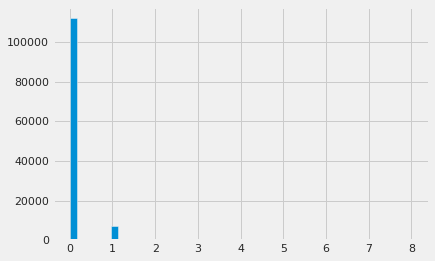

In [265]:
data['required_car_parking_spaces'].hist(bins=50) #try to vizualize the target first

In [266]:
#quite hard to see anything, let's use vizualise the values taken by the target 
data['required_car_parking_spaces'].value_counts()

0    111974
1      7383
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64

Ok now it's a bit better, we now know the number of required car parking spaces. As only few people ask for a lot of parking spaces, let's first dive into the people who ask for at least one parking space, we will dive later into the people who wants several. For now, we use a coded version of this feature created as follow : True if a parking lot was asked and False otherwise.

In [267]:
# Creation of the target, we want to predict if group = True then we send a message else we don't
data['parking'] = data["required_car_parking_spaces"] >= 1 #create a column that indicates to which group the line belongs
# that would be our target column, we want to predict whether or it's a reservation with parking slot requirement

In [268]:
data['parking'].value_counts()

False    111974
True       7416
Name: parking, dtype: int64

## First analysis of relations between parking and other features

One of the simplest way to analyse relation between couple of numerical features is the correlation matrix. This helps us confirm theoretical effect and basic idea we might have. 

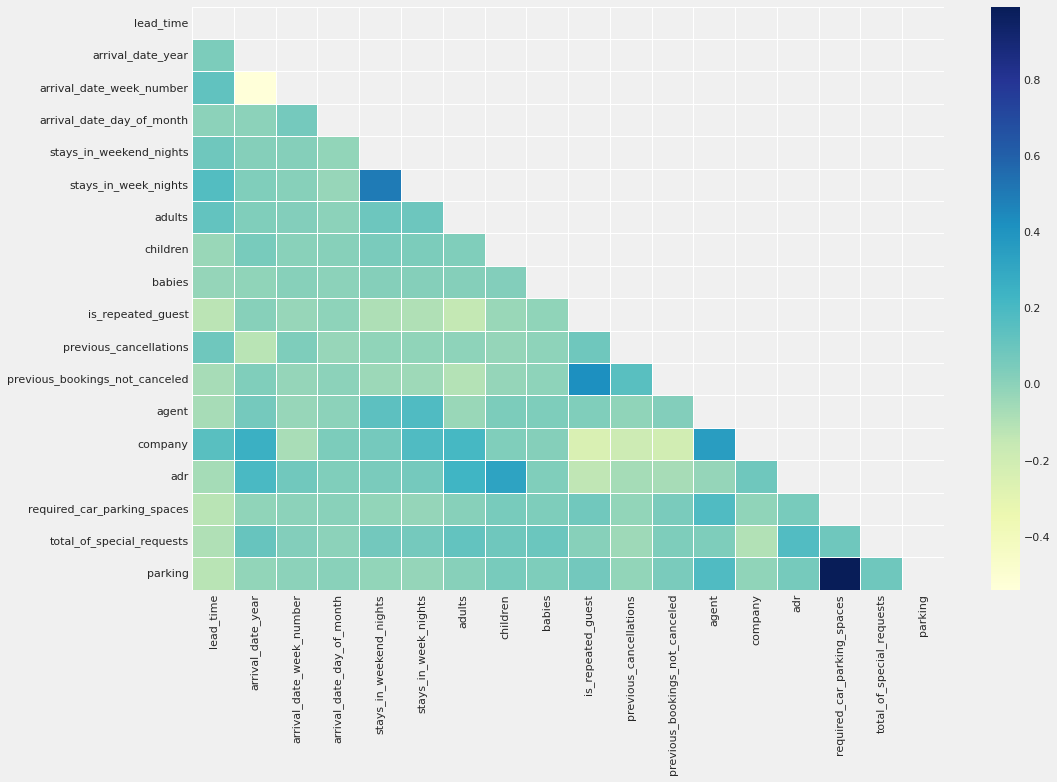

In [269]:
corr=data.corr()
fig, ax = plt.subplots(figsize=(15,10))   
mask = np.triu(np.ones_like(corr, dtype = bool)) #mask the symetric
sns.heatmap(corr,cmap='YlGnBu',linewidths=0.5, ax=ax, mask=mask)
plt.show()

In [270]:
corr["parking"].sort_values(ascending=False) #list of most correlated features with parking

parking                           1.000000
required_car_parking_spaces       0.990370
agent                             0.177888
total_of_special_requests         0.083507
is_repeated_guest                 0.075289
adr                               0.057580
children                          0.056905
previous_bookings_not_canceled    0.047885
babies                            0.037771
adults                            0.014612
arrival_date_day_of_month         0.008553
arrival_date_week_number          0.002852
company                          -0.013500
arrival_date_year                -0.014863
previous_cancellations           -0.018621
stays_in_weekend_nights          -0.019671
stays_in_week_nights             -0.026173
lead_time                        -0.118109
Name: parking, dtype: float64

The correlation heatmap helps us understanding better the linear relation between features and the target (if at least one parking space was asked. Here we can see that there is little correlation between features (from -0.5 to 0.5).
The real point here is about the small "intercorrelation" between variables : the dataset is not full of redundant features that express the same information and we can keep all of them, or at least study all the relations with parking slot before feature selection. 

- WARNING : A big correlation is noticed between parking and required_car_parking_spaces, one might want to drop the last one before modelling, to be sure there is no data leakage of course.

In [271]:
data['agent'].value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: agent, Length: 333, dtype: int64

Here the value corresponds to an agent ID which introduces a false ordinal relation ! This falses completely the result of correlation, let's reencode this feature so we know if the reservation was made by an agency (and thus we would have a non null ID that we replace by 1) or no (replace a null by 0). 
The same issue is raised by the "company" feature and we deal with it the same way.

In [272]:
data['agent'] = data["agent"].isnull().map({True : 0, False : 1})
data['company'] = data['company'].isnull().map({True : 0, False : 1})

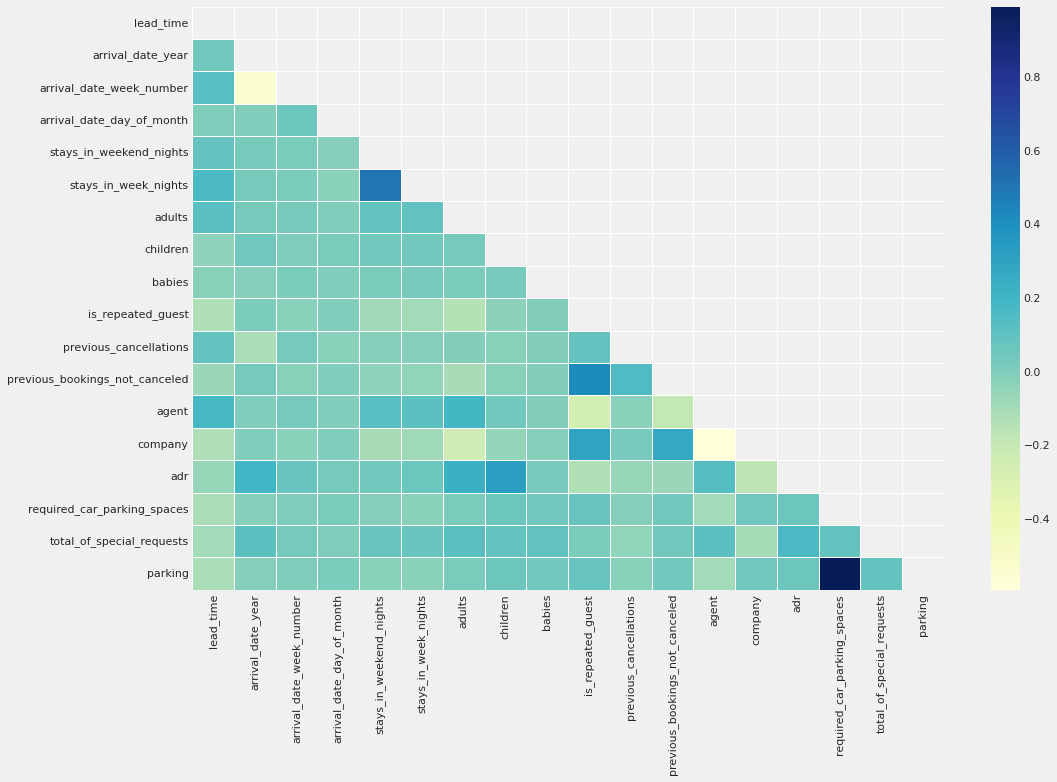

In [273]:
corr=data.corr() #lets see new correlations 
fig, ax = plt.subplots(figsize=(15,10))   
mask = np.triu(np.ones_like(corr, dtype = bool)) #mask the symetric
sns.heatmap(corr,cmap='YlGnBu',linewidths=0.5, ax=ax, mask=mask)
plt.show()

In [274]:
corr["parking"].sort_values(ascending=False)

parking                           1.000000
required_car_parking_spaces       0.990370
total_of_special_requests         0.083507
is_repeated_guest                 0.075289
adr                               0.057580
children                          0.056905
company                           0.050590
previous_bookings_not_canceled    0.047885
babies                            0.037771
adults                            0.014612
arrival_date_day_of_month         0.008553
arrival_date_week_number          0.002852
arrival_date_year                -0.014863
previous_cancellations           -0.018621
stays_in_weekend_nights          -0.019671
stays_in_week_nights             -0.026173
agent                            -0.095214
lead_time                        -0.118109
Name: parking, dtype: float64

We did here correct the false ordinality effect from agent and company ID. 

The most interesting relations with numerical features raised by studying correlations are the following : 

- the number of special requests is likely to increase the will for a parking spot, furthermore, offering a parking spot to demanding clients mgith be not an issue as they won't overreact for an unecessary notification.
- a repeated guest is more likely to ask for a parking place
- client with bigger lodging are more likely to ask for a parking spot
- obviously, features such that number of children and babies might explain the need for comfort, resulting into the ask of a parking spot too. 

Regarding the low level of correlations, one might want not to keep feature below the level of correlation of babies (or maybe go until adults).

It is interesting to note the negative relation between asking for a parking place and some features : 

- booking through an agency might indicate a lower need for parking space, 
- finally, the longer between the booking date and the arrival, the lower the need for a parking space, we might explain this by a lower urgency (more organized clients might not be in the rush and have already plannified their parking). 


**Further analysis**

Now that one have in mind some theoretical effect about numerical feature, let us dig further into the most interesting ones and combine our analysis with a categorical features study.

### Type of hotel

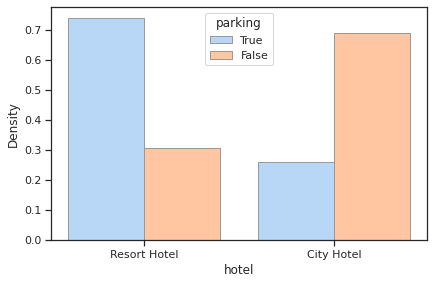

In [275]:
sns.set_theme(style="ticks", palette="pastel")

hue_order = [True , False]

ax = sns.histplot(x = data['hotel'], hue=data['parking'], multiple="dodge", hue_order=hue_order,
                  stat = 'density', shrink = 0.8, common_norm=False, edgecolor = ".6")

Over representation of people requiring a parking spot in the Resort Hotel : maybe in a hotel in the city you don't need car because you have already public transport. In a hotel near the beach the car is useful because there is not many means of transportation

### Children

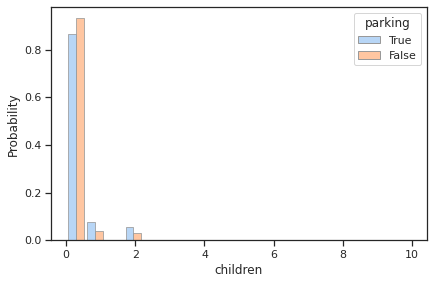

In [276]:
sns.set_theme(style="ticks", palette="pastel")
ax = sns.histplot(x = data['children'], hue=data['parking'], multiple="dodge", hue_order=hue_order,
                  stat = 'probability', shrink = 0.8, common_norm=False, edgecolor = ".6")

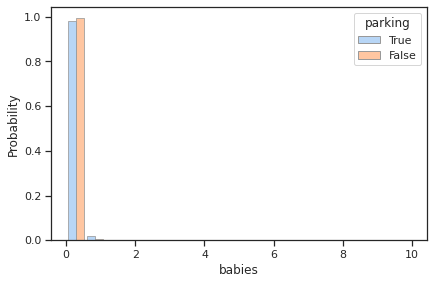

In [277]:
sns.set_theme(style="ticks", palette="pastel")
ax = sns.histplot(x = data['babies'], hue=data['parking'], multiple="dodge", hue_order=hue_order,
                  stat = 'probability', shrink = 0.8, common_norm=False, edgecolor = ".6")

We don't see well, we'll recode the variable into binary variable

In [278]:
data['have_child'] = ((data["children"] + data["babies"]) >= 1).astype('int64') #1 if there is at least one child
#0 otherwise

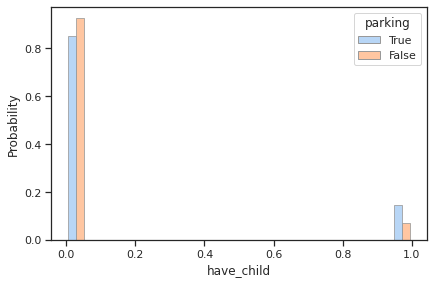

In [280]:
sns.set_theme(style="ticks", palette="pastel")
ax = sns.histplot(x = data['have_child'], hue=data['parking'], multiple="dodge", hue_order=hue_order,
                  stat = 'probability', shrink = 0.8, common_norm=False, edgecolor = ".6")

Having at least one child increase the probability of parking spot demand. What if we go a little bit further into this matter and combine the type of children with the number of children ?

In [281]:
'''
 We create two datasets for each hotel .groupby("children") will group observations by the number of children
 and .count() function will simply count the amount of reservations for each month
'''
n_reserv_H1 = data.loc[(data["hotel"] == "Resort Hotel")].groupby("children")["hotel"].count()
n_parking_H1 = data.loc[(data["hotel"] == "Resort Hotel")].groupby("children")["parking"].sum()

# same thing we do for the second hotel
n_reserv_H2 = data.loc[(data["hotel"] == "City Hotel")].groupby("children")["hotel"].count()
n_parking_H2 = data.loc[(data["hotel"] == "City Hotel")].groupby("children")["parking"].sum()

data_visualH1 = pd.DataFrame({"hotel": "Resort Hotel",
                                "children": list(n_reserv_H1.index),
                                "n_booking": list(n_reserv_H1.values),
                                "n_parking": list(n_parking_H1.values)})
data_visualH2 = pd.DataFrame({"hotel": "City Hotel",
                                "children": list(n_reserv_H2.index),
                                "n_booking": list(n_reserv_H2.values),
                                "n_parking": list(n_parking_H2.values)})
data_visual = pd.concat([data_visualH1, data_visualH2], ignore_index=True)

In [282]:
#let's see the share of people asking for parking slots ? 
data_visual["percent_parking"] = data_visual["n_parking"] / data_visual["n_booking"] * 100 # percent of cancelations

data_visual[['hotel','percent_parking']].groupby('hotel').mean() # a big difference between the hotel !! 

,percent_parking
hotel,
City Hotel,4.734294
Resort Hotel,17.602953


This conforts us the idea that the type of hotel is really important : client of a Resort Hotel are really more likely to ask for a parking spot (17.6% of the clients, vs only 4.7% for the city hotel).  Let us dive into the children topic.

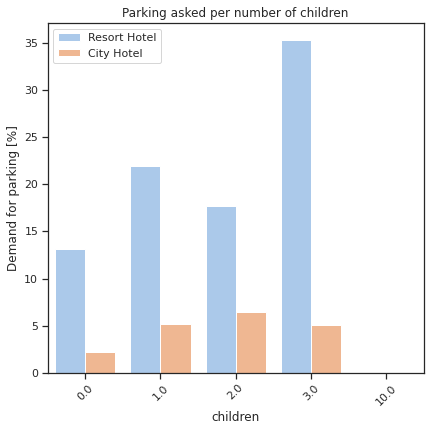

In [283]:
plt.figure(figsize=(6, 6))
sns.barplot(x = "children", y = "percent_parking" , hue="hotel",
            hue_order = ["Resort Hotel", "City Hotel"], data=data_visual)
plt.title("Parking asked per number of children")
plt.xticks(rotation=45)
plt.ylabel("Demand for parking [%]")
plt.legend()
plt.show()

Now we can see a clear difference between having a child or not ! Considering the resort hotel, we even notice that the share of client asking for a parking slot is really higher (atteining 35% !).
One might also avoid sending an sms to a client without a child in the City Hotel as less than 2.2% of them ask for a parking space.
The results also confirms the idea that there is a significant difference in parking ask wether you have a child or not (13% if nonen vs 25% in the resort hotel, 2.2% vs 5% in the city hotel).

In [284]:
data.drop(['children', 'babies'], axis = 1, inplace = True) 
#as we created column "have child" we don't need them anymore

### Date columns

Date columns are : 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights' \
We can eliminate year column as we don't care if there was more demand in a certain year in the past. Week number, day of the month are too precised we also eliminate these variables. 
When looking at the correlation matrix, one can also see that time variables such as 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month' have very little correlation with the parking demand : this confirms that there is no need to keep this features.

In [285]:
data.drop(['arrival_date_year', 'arrival_date_day_of_month', 'arrival_date_week_number'], axis = 1, inplace = True)

### Month

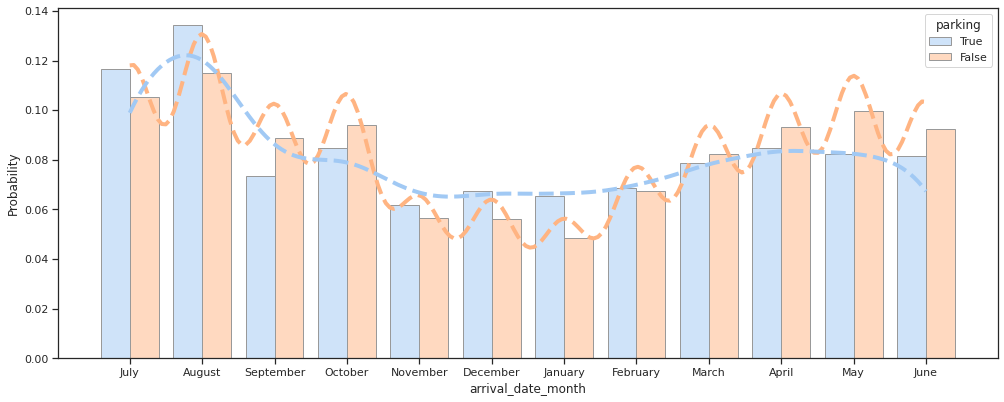

In [286]:
plt.figure(figsize=(15, 6))
sns.set_theme(style="ticks", palette="pastel")
ax = sns.histplot(x = data['arrival_date_month'], hue=data['parking'], hue_order=hue_order, multiple="dodge", 
                  stat = 'probability', shrink = 0.8, common_norm=False, edgecolor = ".6",\
                  kde = True, line_kws = {"ls" : "--","lw": 4})

Above, we plotted the probabilty of asking (or not) for a parking space over the months. We see here that there is a higher demand in July and August, maybe we can send more message during this period.

### Customer type

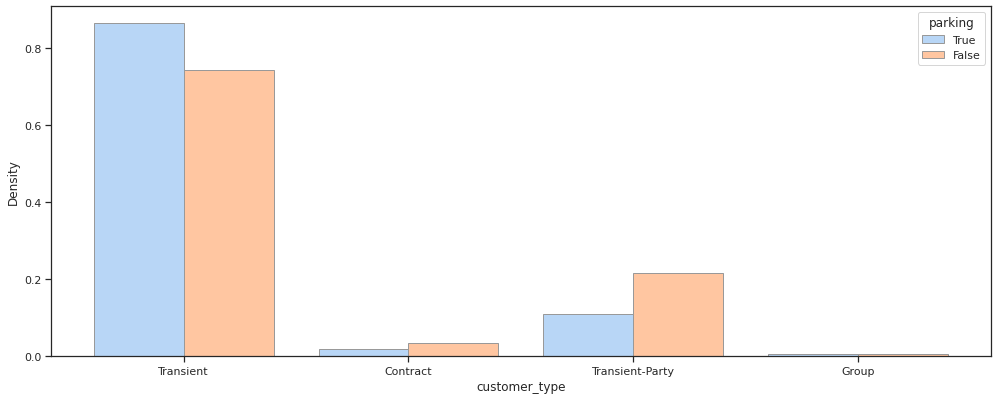

In [287]:
plt.figure(figsize=(15, 6))
sns.set_theme(style="ticks", palette="pastel")
ax = sns.histplot(x = data['customer_type'], hue=data['parking'], hue_order=hue_order, multiple="dodge", 
                  stat = 'density', shrink = 0.8, common_norm=False, edgecolor = ".6")

The type of customer who need the most a parking spot is Transient as more than 82% of the people asking for a parking spot are Transient customers. Let's see how repeated guests behave in terms of parking demand. 

In [352]:
'''
 We create two datasets for each hotel .groupby("is_repeated_guest") will group observations by the number of children
 and .count() function will simply count the amount of reservations for each type of clients.
'''
n_reserv_H1 = data.groupby("is_repeated_guest")["hotel"].count()
n_parking_H1 = data.groupby("is_repeated_guest")["parking"].sum()

data_visual = pd.DataFrame({"is_repeated_guest": list(n_reserv_H1.index),
                                "n_booking": list(n_reserv_H1.values),
                                "n_parking": list(n_parking_H1.values)})
#let's see the share of people asking for parking slots ? 
data_visual["percent_parking"] = data_visual["n_parking"] / data_visual["n_booking"] * 100 # percent of cancelations
data_visual

,is_repeated_guest,n_booking,n_parking,percent_parking
0,0,115580,6798,5.881640
1,1,3810,618,16.220472


Here we can see that the percentage of people asking for parking vary wether or not you are a repeated guest. As a hotel, you might offer more services to your repeated guest and send an sms for parking !

### Country

   To study the country features, we build the lists of countries that ask the most (and the least) for parkings. We then study the difference in the two lists. If the lists look quiete the same, one might conclude that there is no major difference regarding the country.

In [307]:
data_country = data[['parking','country', 'hotel']].groupby(['parking', 'country'])['hotel']\
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False)

In [308]:
data_country[data_country['parking'] == False][:10]

,parking,country,count
134,False,PRT,45502
59,False,GBR,11572
56,False,FRA,9839
51,False,ESP,7377
43,False,DEU,7045
81,False,ITA,3639
76,False,IRL,3292
15,False,BEL,2211
25,False,BRA,2085
168,False,USA,1955


In [309]:
data_country[data_country['parking'] == True][:10]

,parking,country,count
234,True,PRT,3088
198,True,ESP,1191
201,True,FRA,576
202,True,GBR,557
194,True,DEU,242
226,True,NLD,177
250,True,USA,142
185,True,BRA,139
182,True,BEL,131
213,True,ITA,127


In [310]:
a = list(data_country[data_country['parking'] == True][:10]['country'])
b = list(data_country[data_country['parking'] == False][:10]['country'])
set(a) & set(b) # 9 countries are in common so country doesn't seem to be an interesting variable for this problem

{'BEL', 'BRA', 'DEU', 'ESP', 'FRA', 'GBR', 'ITA', 'PRT', 'USA'}

There is no significant difference for this variable in the 2 groups, we can delete the country column.

In [12]:
data.drop(['country'], axis=1, inplace = True)

### Reserved room type and special requests

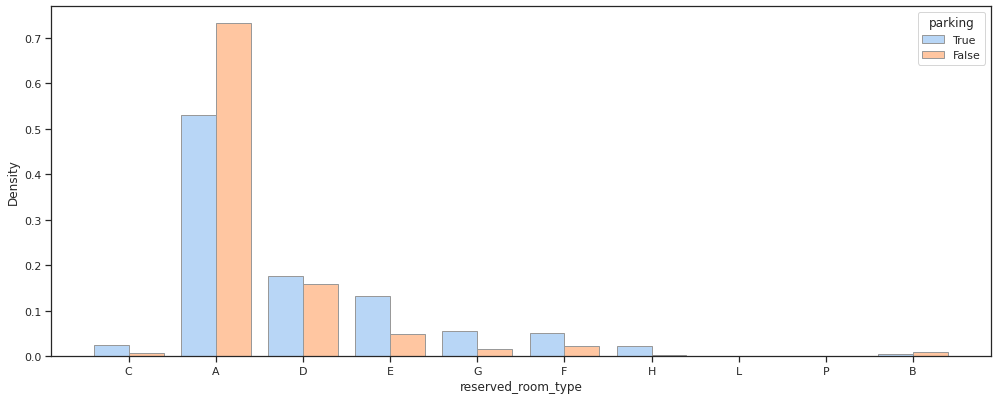

In [312]:
plt.figure(figsize=(15, 6))
sns.set_theme(style="ticks", palette="pastel")
ax = sns.histplot(x = data['reserved_room_type'], hue=data['parking'], multiple="dodge",\
                  hue_order=hue_order, stat = 'density', shrink = 0.8, common_norm=False,\
                  edgecolor = ".6")

People who reserved room type C, E, D, F, H, G are more likely to ask for a parking spot.

Text(0, 0.5, 'Count')

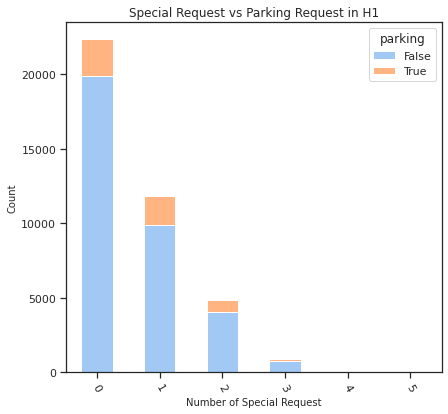

In [350]:
data_req = data[(data['hotel'] == 'Resort Hotel')].groupby(['total_of_special_requests', 'parking']).size().unstack(level=1)
data_req.plot(kind='bar', stacked=True, figsize=(6,6))
plt.title('Special Request vs Parking Request in H1')
plt.xlabel('Number of Special Request', fontsize=10)
plt.xticks(rotation=300)
plt.ylabel('Count', fontsize=10)

In [357]:
'''
 We create two datasets for each hotel .groupby("is_repeated_guest") will group observations by the number of children
 and .count() function will simply count the amount of reservations for each type of clients.
'''
n_reserv_H1 = data.groupby("total_of_special_requests")["hotel"].count()
n_parking_H1 = data.groupby("total_of_special_requests")["parking"].sum()

data_visual = pd.DataFrame({"total_of_special_requests": list(n_reserv_H1.index),
                                "n_booking": list(n_reserv_H1.values),
                                "n_parking": list(n_parking_H1.values)})
#let's see the share of people asking for parking slots ? 
data_visual["percent_parking"] = data_visual["n_parking"] / data_visual["n_booking"] * 100 # percent of cancelations

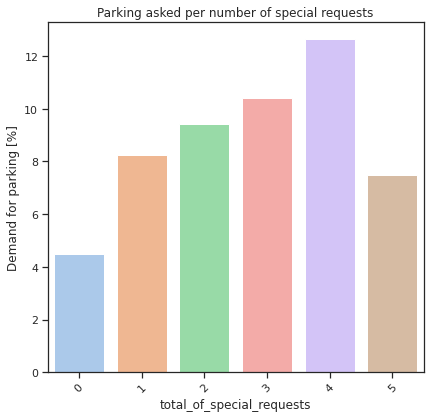

In [359]:
plt.figure(figsize=(6, 6))
sns.barplot(x = "total_of_special_requests", y = "percent_parking", data=data_visual)
plt.title("Parking asked per number of special requests")
plt.xticks(rotation=45)
plt.ylabel("Demand for parking [%]")
plt.show()

Finally, the numer of special requests might have an impact on wether or not you might offer a parking spot. We see that there is an increase in hte demand for parking with no number of special requests, as suggested by the correlation matrix. Furthermore, you might already been in a dialogue with a custoemrs that have special requests which would make them less likely to be pissed by a parking notifcation !

## Keeping features

With all the work done so far, we have a better idea of the features we might want to work with and include in our modelling. Let's work on their type before our ML pipeline.

In [345]:
data.columns

Index(['hotel', 'lead_time', 'arrival_date_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'deposit_type', 'agent', 'company',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'parking', 'have_child'],
      dtype='object')

In [346]:
data['have_child'] = data['have_child'] * 1 #convert boolean column to int column

In [347]:
data.dtypes 

hotel                              object
lead_time                           int64
arrival_date_month                 object
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
deposit_type                       object
agent                               int64
company                             int64
customer_type                      object
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
parking                              bool
have_child                        

In [348]:
#create list for numerical and categorial variables
num_features = list(data.select_dtypes(include=['float64', 'int32', 'int64']).columns)
cat_features = list(data.select_dtypes(include=['object']).columns)

In [161]:
from sklearn.metrics import recall_score, precision_score, roc_auc_score, f1_score, accuracy_score
from sklearn.metrics import make_scorer # useful to pass score in argument of cross_val_score function

recall=make_scorer(recall_score)
precision=make_scorer(precision_score)
roc= make_scorer(roc_auc_score)
f1=make_scorer(f1_score)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

In [164]:
data.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'parking'],
      dtype='object')

In [166]:
numeric_features = ["babies", "children", "total_of_special_requests", 'is_repeated_guest', 'booking_changes'
                    , 'agent', 'adr' , 'company', 'lead_time', 'previous_bookings_not_canceled']
categorical_features = ["hotel", "market_segment","deposit_type","customer_type", 'distribution_channel' ,
                        'country', 'reserved_room_type']
features = numeric_features + categorical_features
X = data.drop(["parking", "required_car_parking_spaces"], axis=1)[features]
y = data["parking"]

In [188]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler

numeric_transformer = SimpleImputer(strategy="constant", fill_value=0) # to deal with missing numeric data

numeric_transformer2 = Pipeline(steps =[
                                    ('impute', numeric_transformer),
                                    ('scaling', StandardScaler())])

categorical_transformer = Pipeline(steps=[
                                    ("imputer", SimpleImputer(strategy="constant", fill_value="Not defined")),
                                    ("onehot", OneHotEncoder(handle_unknown='ignore'))]) # to deal with missing categorical data 

preproc2 = ColumnTransformer(transformers=[("num", numeric_transformer2, numeric_features),
                                          ("cat", categorical_transformer, categorical_features)])

In [189]:
grids[name]

{'n_estimators': [90, 100, 150, 200, 300]}

In [192]:
pipe.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('num',
                                    Pipeline(steps=[('impute',
                                                     SimpleImputer(fill_value=0,
                                                                   strategy='constant')),
                                                    ('scaling',
                                                     StandardScaler())]),
                                    ['babies', 'children',
                                     'total_of_special_requests',
                                     'is_repeated_guest', 'booking_changes',
                                     'agent', 'adr', 'company', 'lead_time',
                                     'previous_bookings_not_canceled']),
                                   ('cat',
                                    Pipeline(steps=[('imputer',
                                                     SimpleImputer(fill_value='No

In [193]:
models = [("rf_clf", RandomForestClassifier())]

grids = {"rf_clf" :  {'rf_clf__n_estimators': [90, 100, 150, 200, 300]}}
for name, model in models:
    pipe = Pipeline(steps=[('preprocessor', preproc2), (name, model)])
    clf = GridSearchCV(pipe, grids[name], cv=3)
    clf.fit(X, y)
    print('Results for {}'.format(name))
    print(clf.cv_results_)

KeyboardInterrupt: 

In [ ]:
best_rf_clf= random_search.best_estimator_

In [183]:
best_rf_clf.fit(X_prepared.astype('float64'),y_train)
features_importances = pd.Series(best_xgb_clf.feature_importances_, index=X_.columns).sort_values(ascending=False)
features_importances.plot(kind='barh', figsize=(10,12)) #use feature importance method and plot it

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}